<h1><center> Departamento de Marketing </center></h1> 

*  Objetivo: Recopilar los datos de la empresa sobre sus empleados y desarrollar un modelo de clasificación que pueda dividir sus clientes en al menos 3 grupos distintos. 

<img src=https://veracruz.uo.edu.mx/sites/default/files/Segmentacion-de-Mercados-Opt.jpg>

### Importar librerias

In [1]:
# By: Bastián Astudillo Fica
import pandas as pd
# Importa la biblioteca pandas para el manejo de datos tabulares

import numpy as np
# Importa la biblioteca numpy para operaciones numéricas y matrices

import seaborn as sns
# Importa la biblioteca seaborn para visualización de datos

import matplotlib.pyplot as plt
# Importa la biblioteca matplotlib para visualización de gráficos

from sklearn.preprocessing import StandardScaler, normalize
# Importa las clases StandardScaler y normalize del módulo preprocessing de la biblioteca scikit-learn
# Estas clases se utilizan para realizar escalado y normalización de datos

from sklearn.cluster import KMeans
# Importa la clase KMeans del módulo cluster de la biblioteca scikit-learn
# Se utiliza para realizar el algoritmo de clustering K-means

from sklearn.decomposition import PCA
# Importa la clase PCA del módulo decomposition de la biblioteca scikit-learn
# Se utiliza para realizar el análisis de componentes principales (PCA)

In [2]:
# By: Bastián Astudillo Fica
creditcard_df = pd.read_csv("Marketing_data.csv")
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# By: Bastián Astudillo Fica
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# By: Bastián Astudillo Fica
creditcard_df.describe()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* El balance medio es 1564 dolares
* La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
* El promedio de las compras es 1000 dolares
* El importe máximo de compra no recurrente es en promedio ~600 dolares
* El promedio de la frecuencia de las compras está cerca de 0.5
* El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
* El promedio del límite de crédito es ~ 4500 dolares
* El porcentaje de pago completo es 15%
* Los clientes llevan de promedio en el servicio 11 años

In [5]:
# By: Bastián Astudillo Fica
# Quien ha hecho una compra de $40761
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# By: Bastián Astudillo Fica
# Quien ha hecho una compra de $40761
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### VISUALIZACIÓN DEL DATASET

<Axes: >

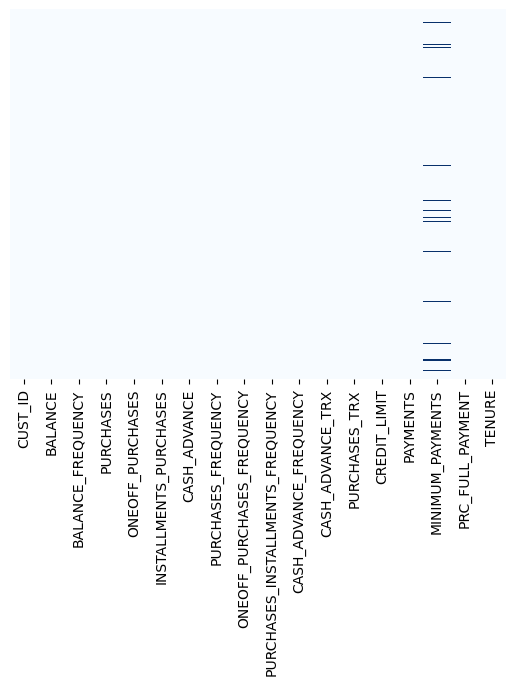

In [7]:
# By: Bastián Astudillo Fica
# Comprobar a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [8]:
# By: Bastián Astudillo Fica
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# By: Bastián Astudillo Fica
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
# By: Bastián Astudillo Fica
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

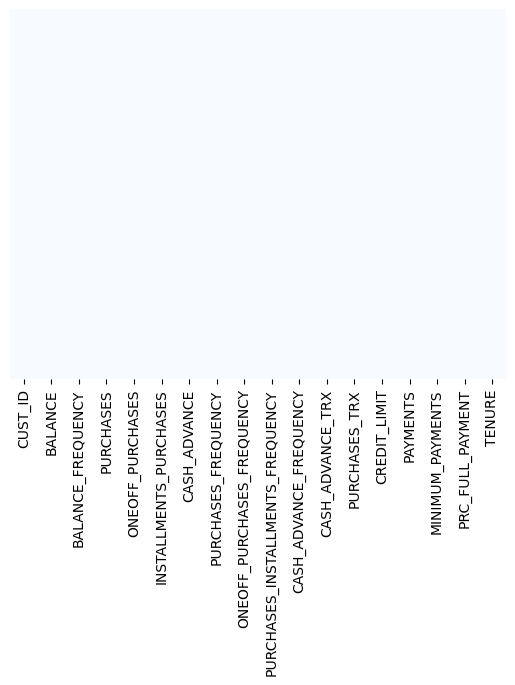

In [11]:
# By: Bastián Astudillo Fica
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [12]:
# By: Bastián Astudillo Fica
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [13]:
# By: Bastián Astudillo Fica
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

In [14]:
# By: Bastián Astudillo Fica
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# By: Bastián Astudillo Fica
n = len(creditcard_df.columns)
n

17

In [16]:
# By: Bastián Astudillo Fica
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

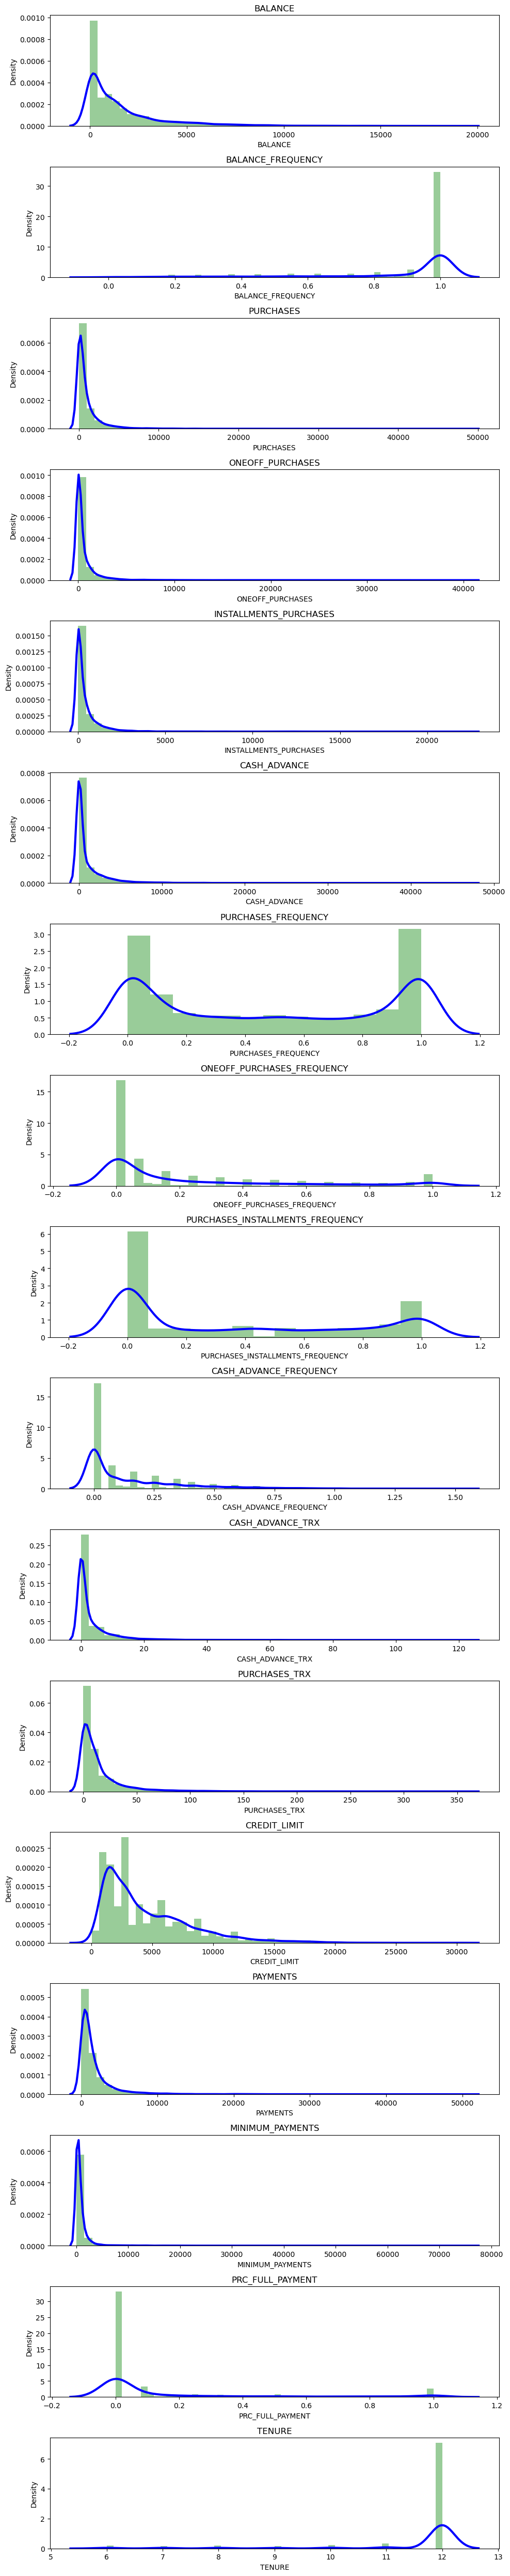

In [17]:
import warnings
warnings.filterwarnings("ignore")

# By: Bastián Astudillo Fica
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()


* Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
* Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'

<h1><center> Matriz de Correlación </center></h1> 

<Axes: >

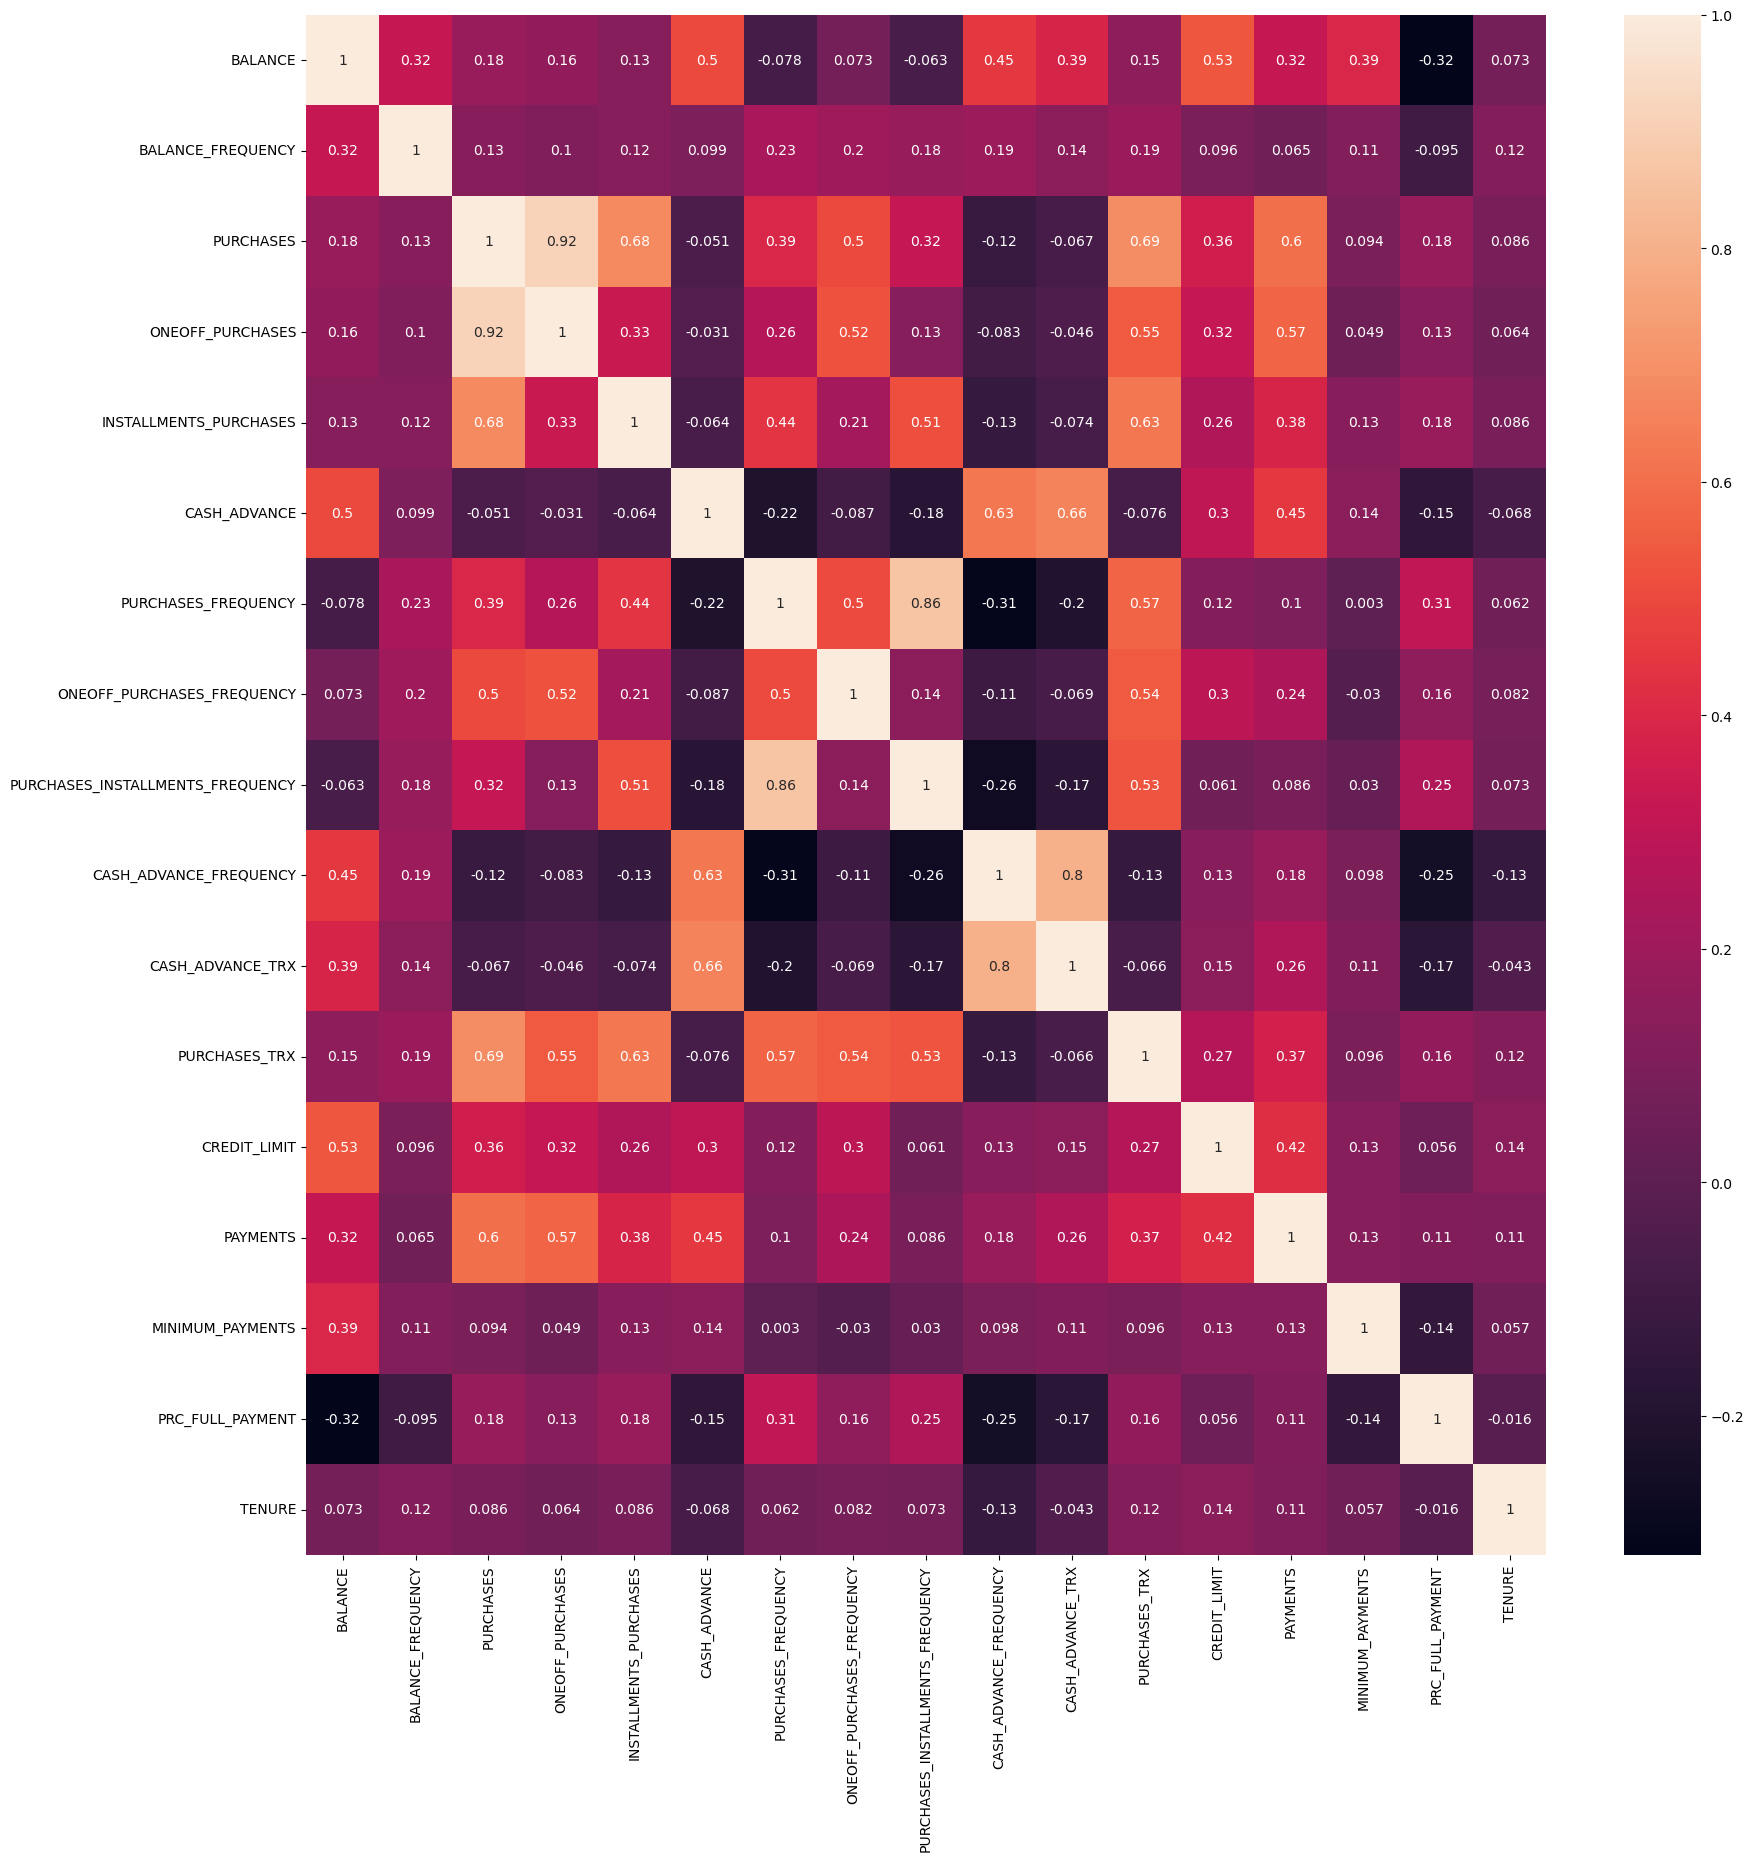

In [18]:
# By: Bastián Astudillo Fica
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)


* 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
* Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'

<h1><center>NÚMERO ÓPTIMO DE CLISTERS -  MÉTODO DEL CODO </center></h1> 

- El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de clustering diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [19]:
# By: Bastián Astudillo Fica
scaler = StandardScaler()
# Crea una instancia del objeto StandardScaler de la biblioteca scikit-learn

creditcard_df_scaled = scaler.fit_transform(creditcard_df)
# Utiliza el método fit_transform para escalar los datos de creditcard_df utilizando el objeto scaler
# fit_transform ajusta el escalado de los datos y devuelve los datos escalados

In [20]:
# By: Bastián Astudillo Fica
creditcard_df_scaled.shape

(8950, 17)

In [21]:
# By: Bastián Astudillo Fica
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

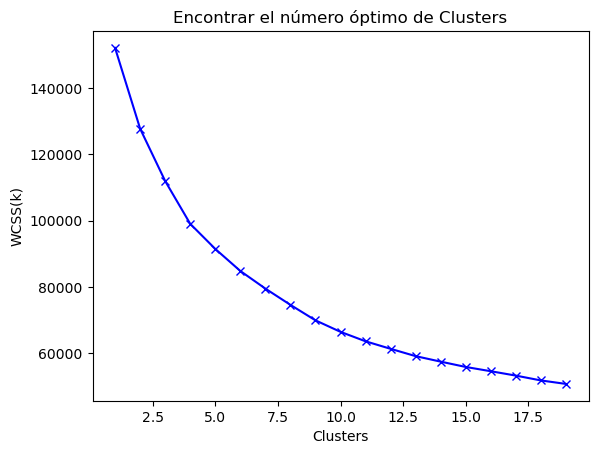

In [22]:
# By: Bastián Astudillo Fica
scores_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10)
    # Crea una instancia del objeto KMeans con el número de clusters especificado por i
    # Establece el valor de n_init en 10 para suprimir la advertencia
    
    kmeans.fit(creditcard_df_scaled)
    # Ajusta el modelo de KMeans utilizando los datos escalados
    
    scores_1.append(kmeans.inertia_)
    # Agrega el valor de la inercia (WCSS) del modelo a la lista scores_1

plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()
# Grafica el número de clusters versus la inercia (WCSS) utilizando los valores en scores_1
# Se muestra el gráfico utilizando plt.show()

<h1><center>   MÉTODO DE K-MEANS </center></h1> 

In [23]:
# By: Bastián Astudillo Fica
kmeans = KMeans(n_clusters=8, n_init=10)
# Crea una instancia del objeto KMeans con 8 clusters
# No se especifica el valor de n_init, por lo que utilizará el valor predeterminado (n_init=10)

kmeans.fit(creditcard_df_scaled)
# Ajusta el modelo de KMeans utilizando los datos escalados creditcard_df_scaled

labels = kmeans.labels_
# Obtiene las etiquetas asignadas a cada muestra en base a los clusters encontrados por KMeans
# Las etiquetas indican a qué cluster pertenece cada muestra


In [24]:
# By: Bastián Astudillo Fica
kmeans.cluster_centers_.shape

(8, 17)

In [25]:
# By: Bastián Astudillo Fica
labels.shape,labels.min(),labels.max()

((8950,), 0, 7)

In [26]:
# By: Bastián Astudillo Fica
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 2, 0, ..., 7, 7, 7])

In [27]:
# By: Bastián Astudillo Fica
# Unimos las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


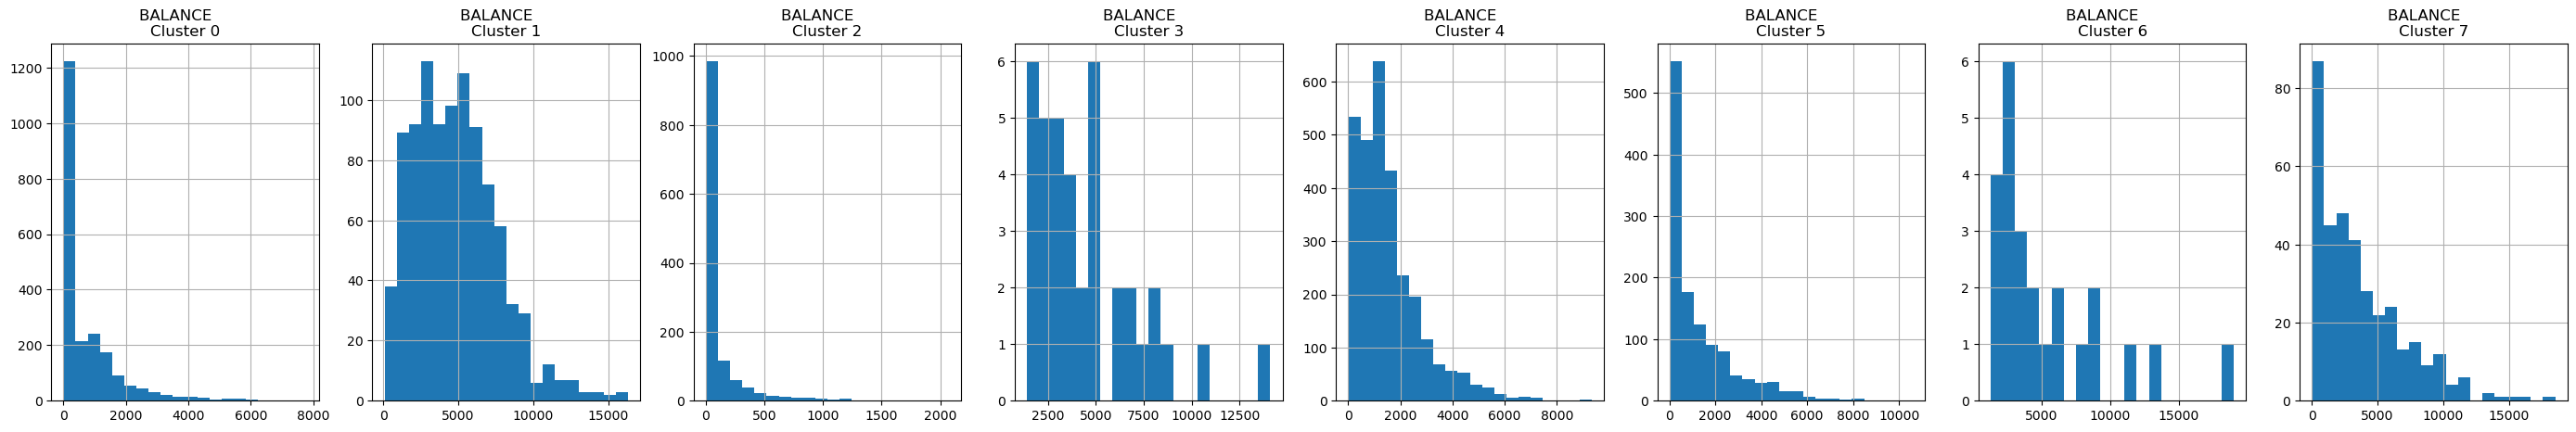

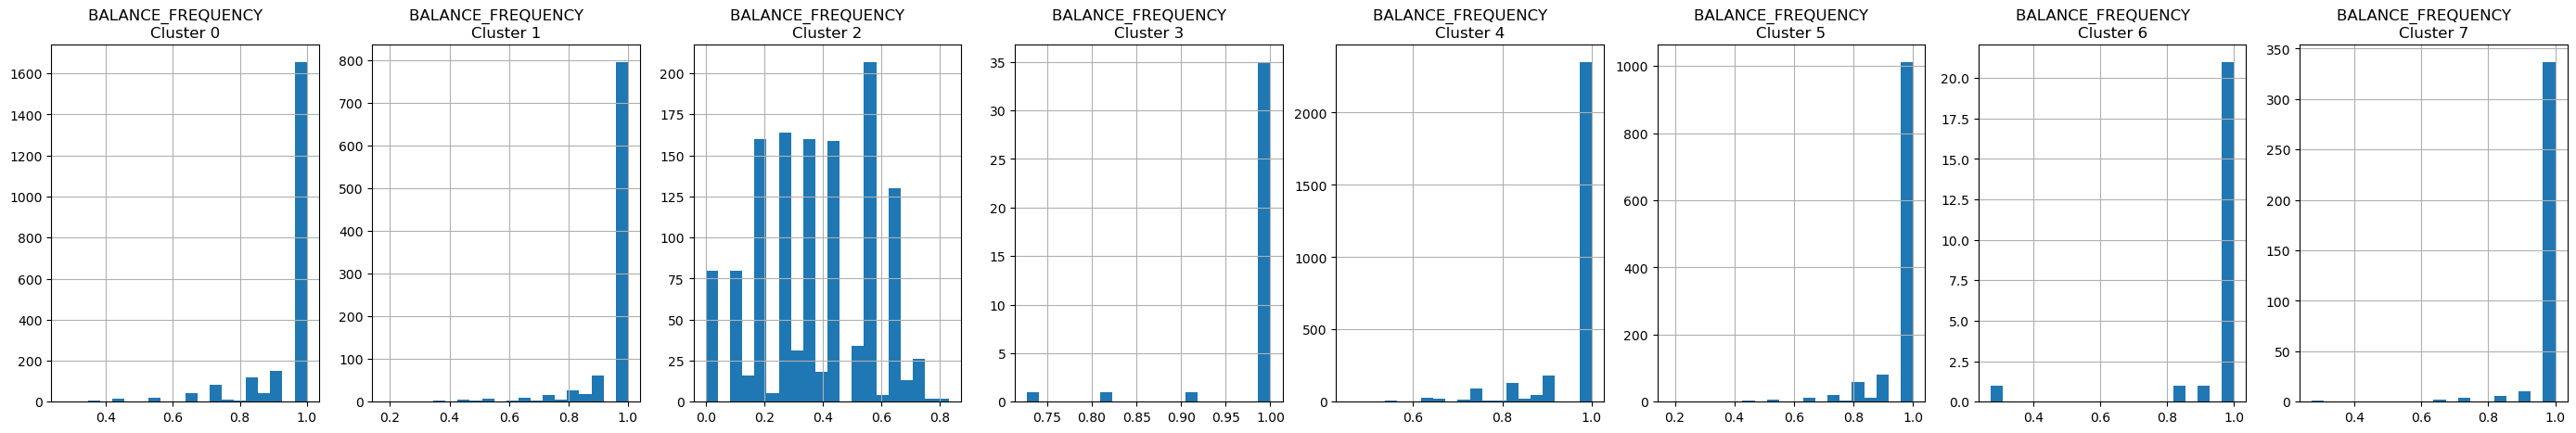

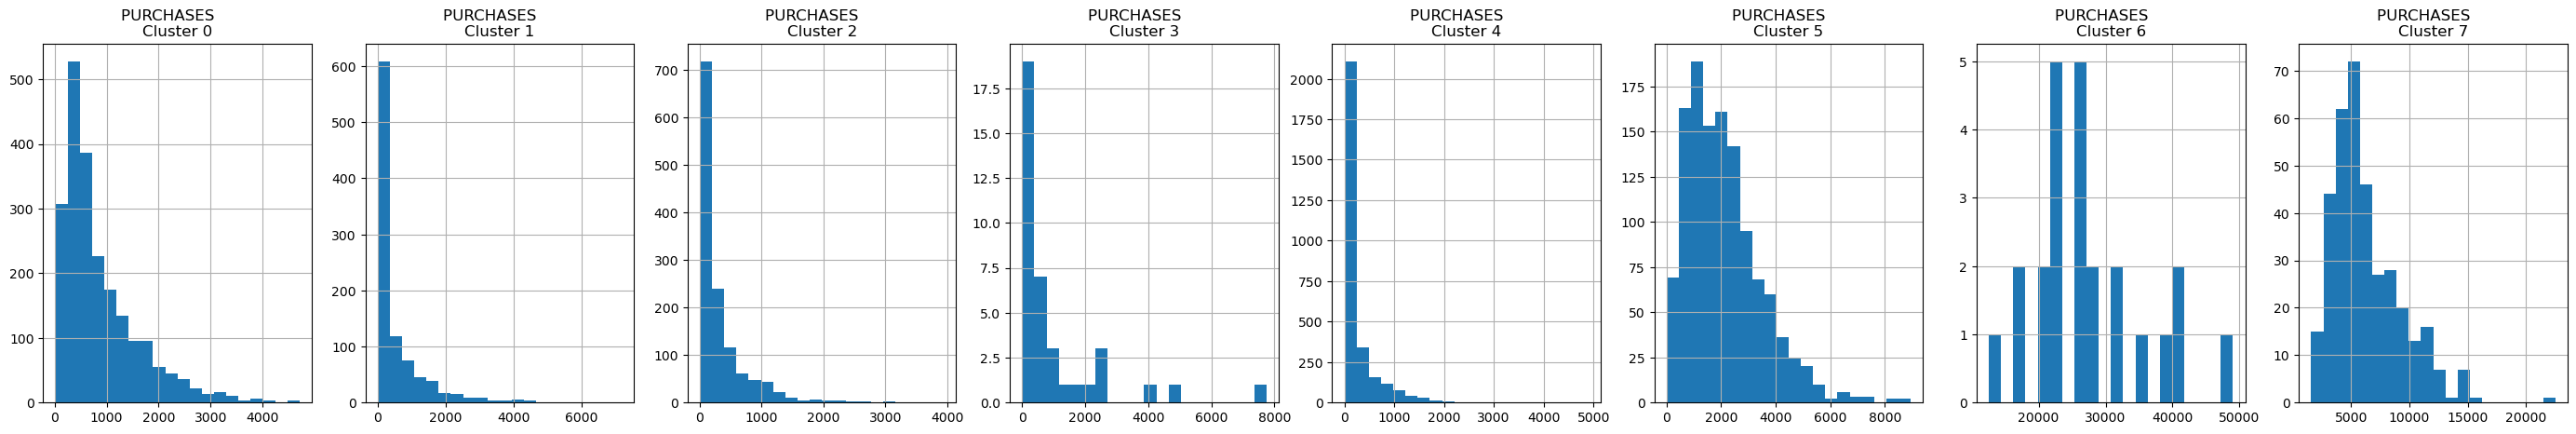

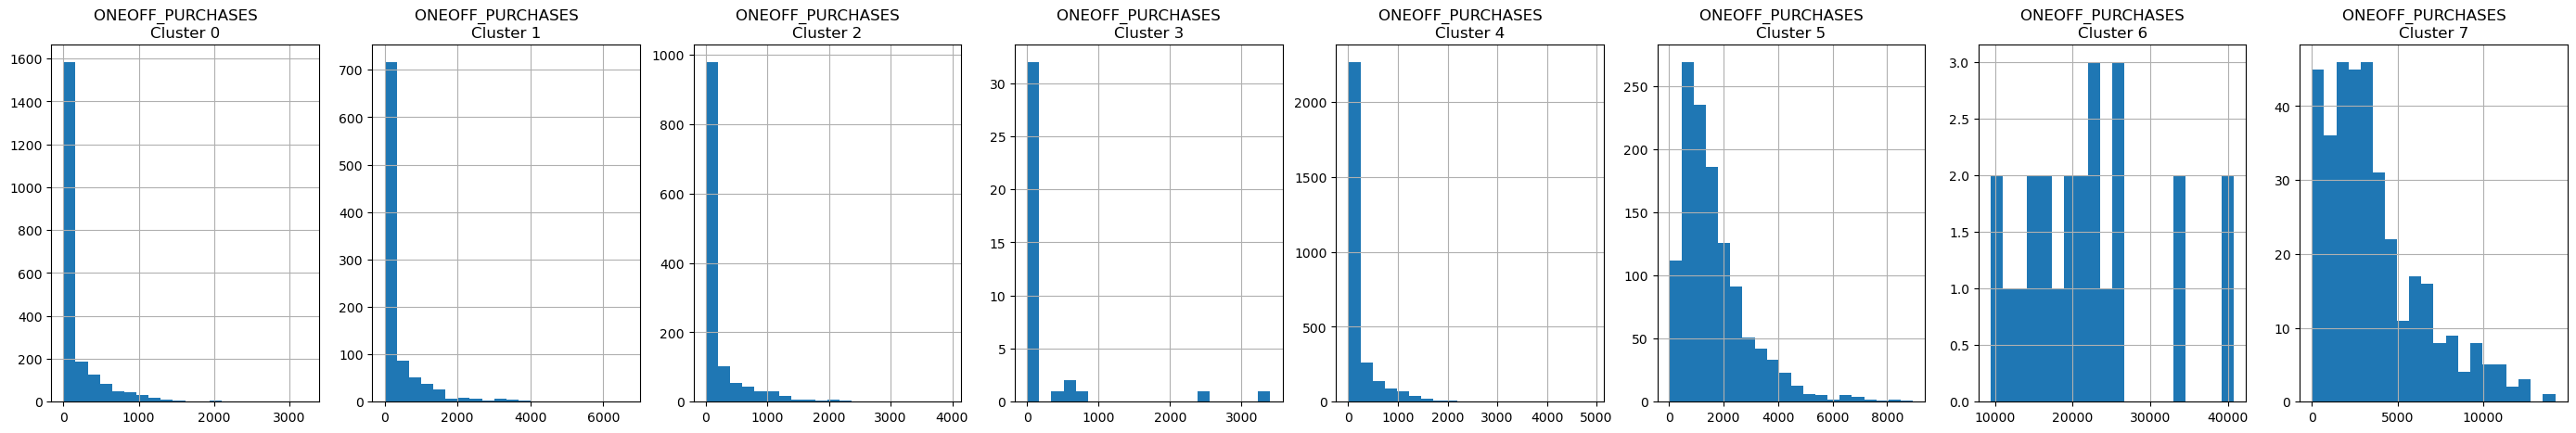

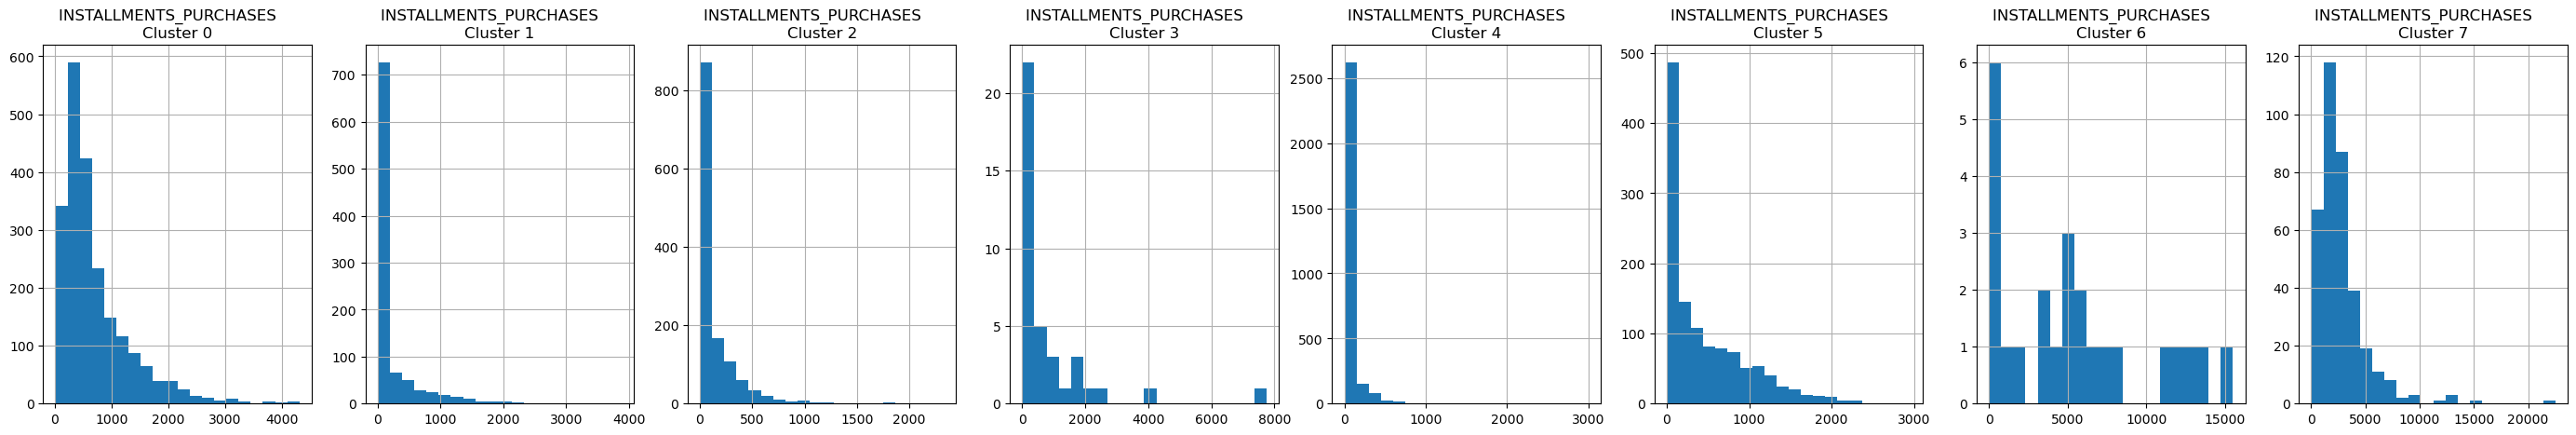

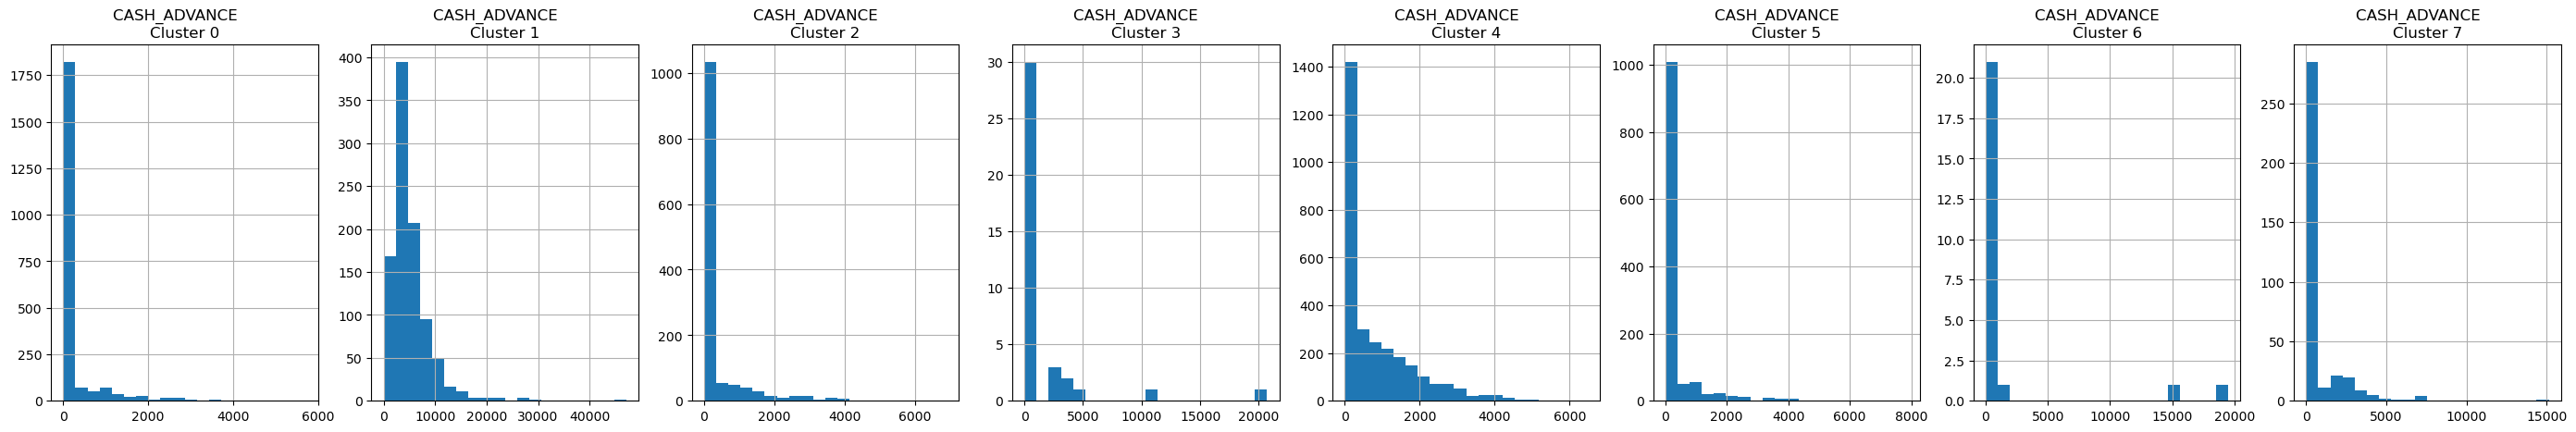

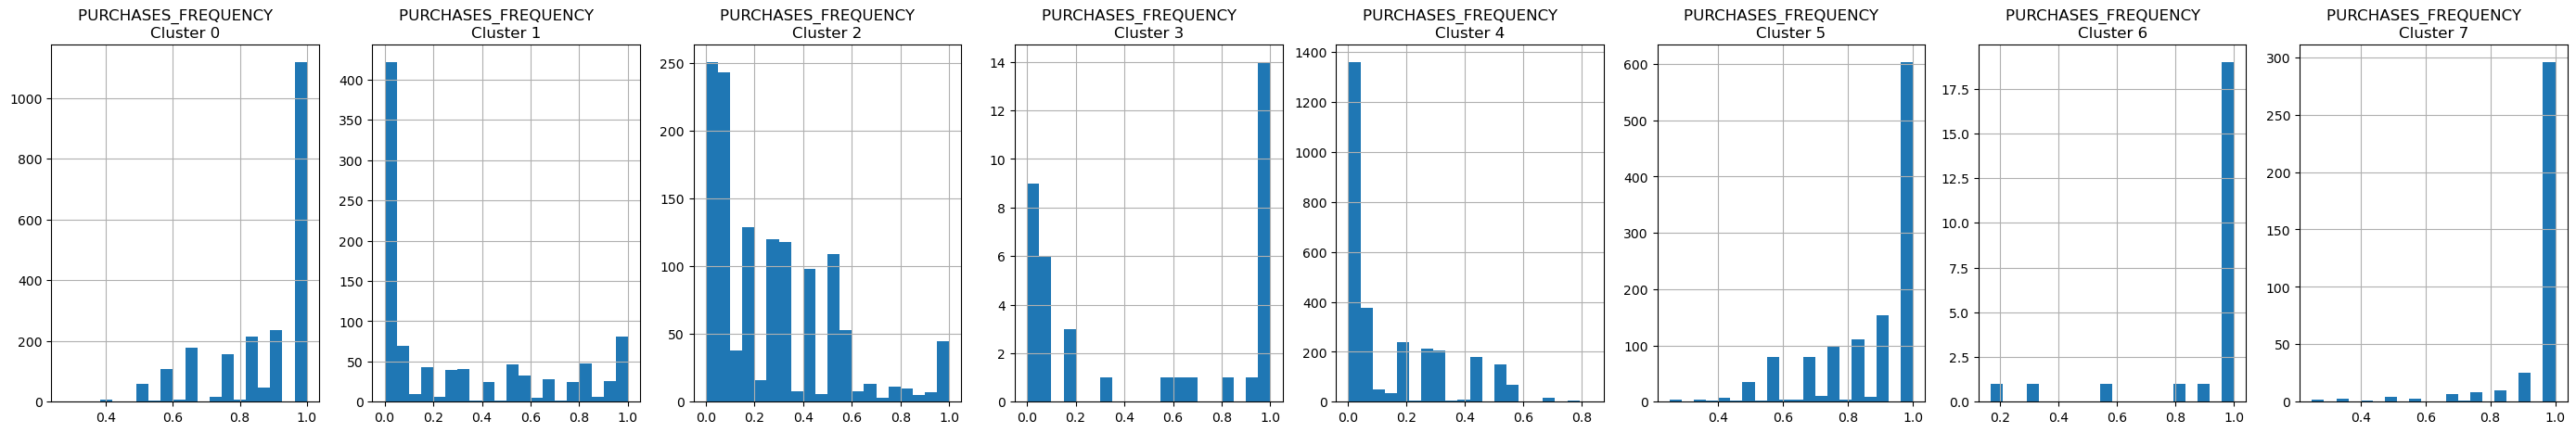

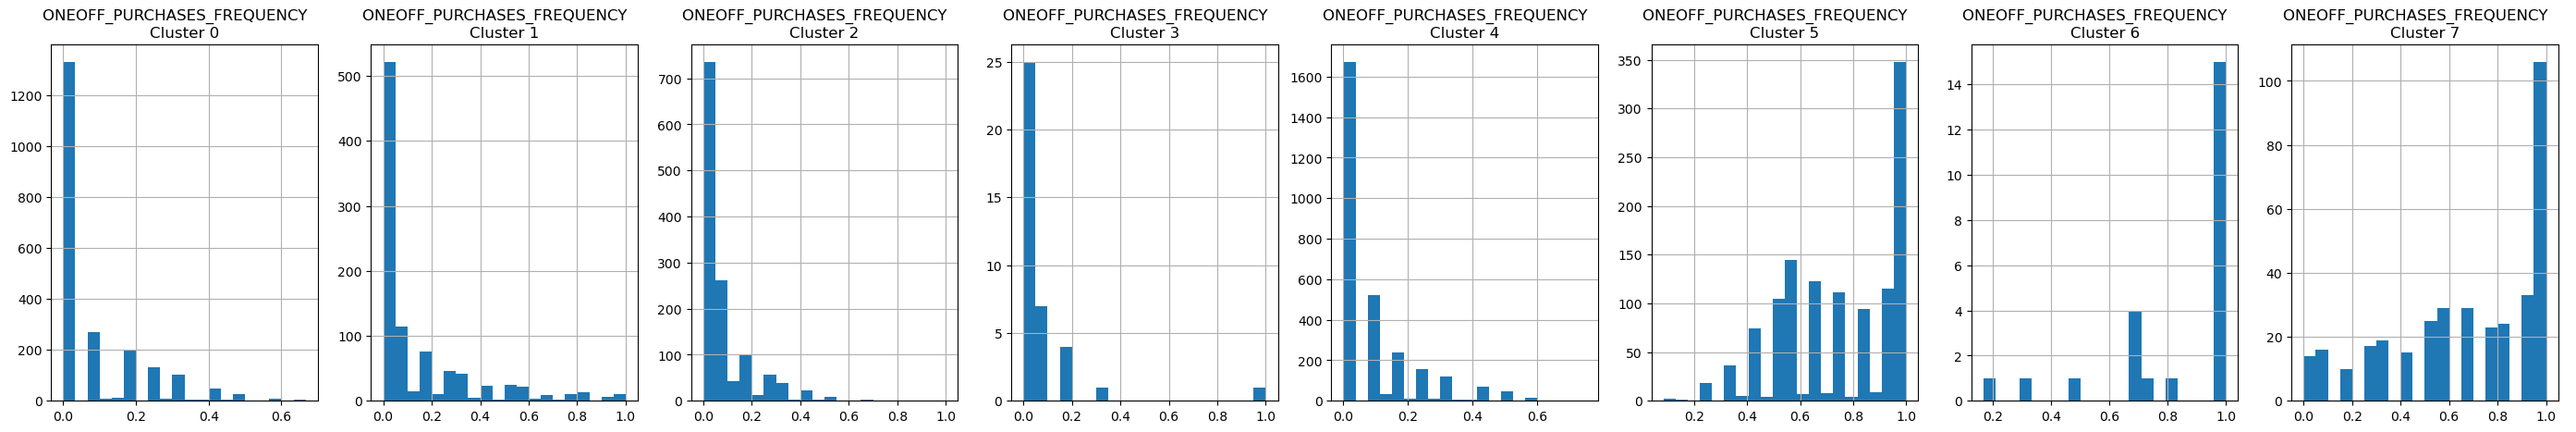

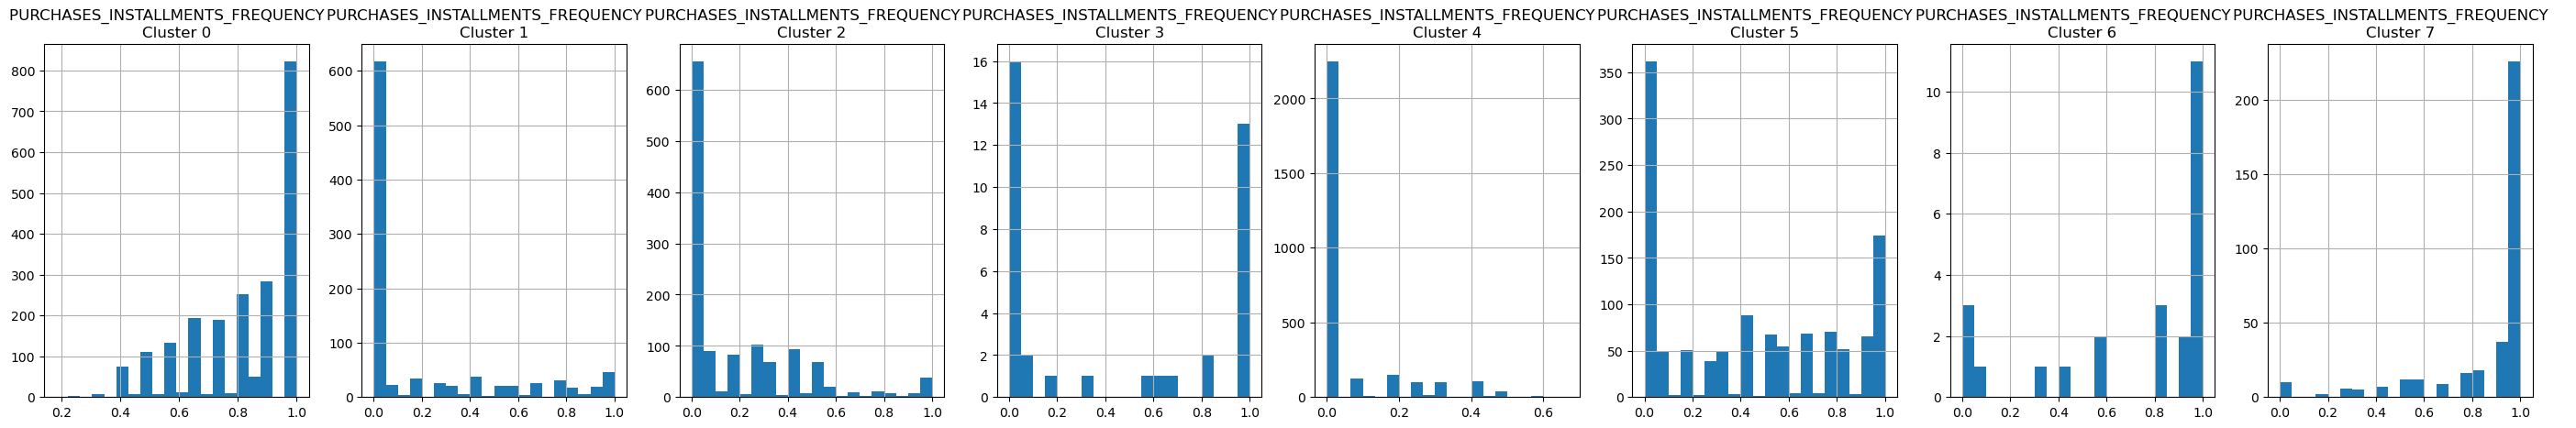

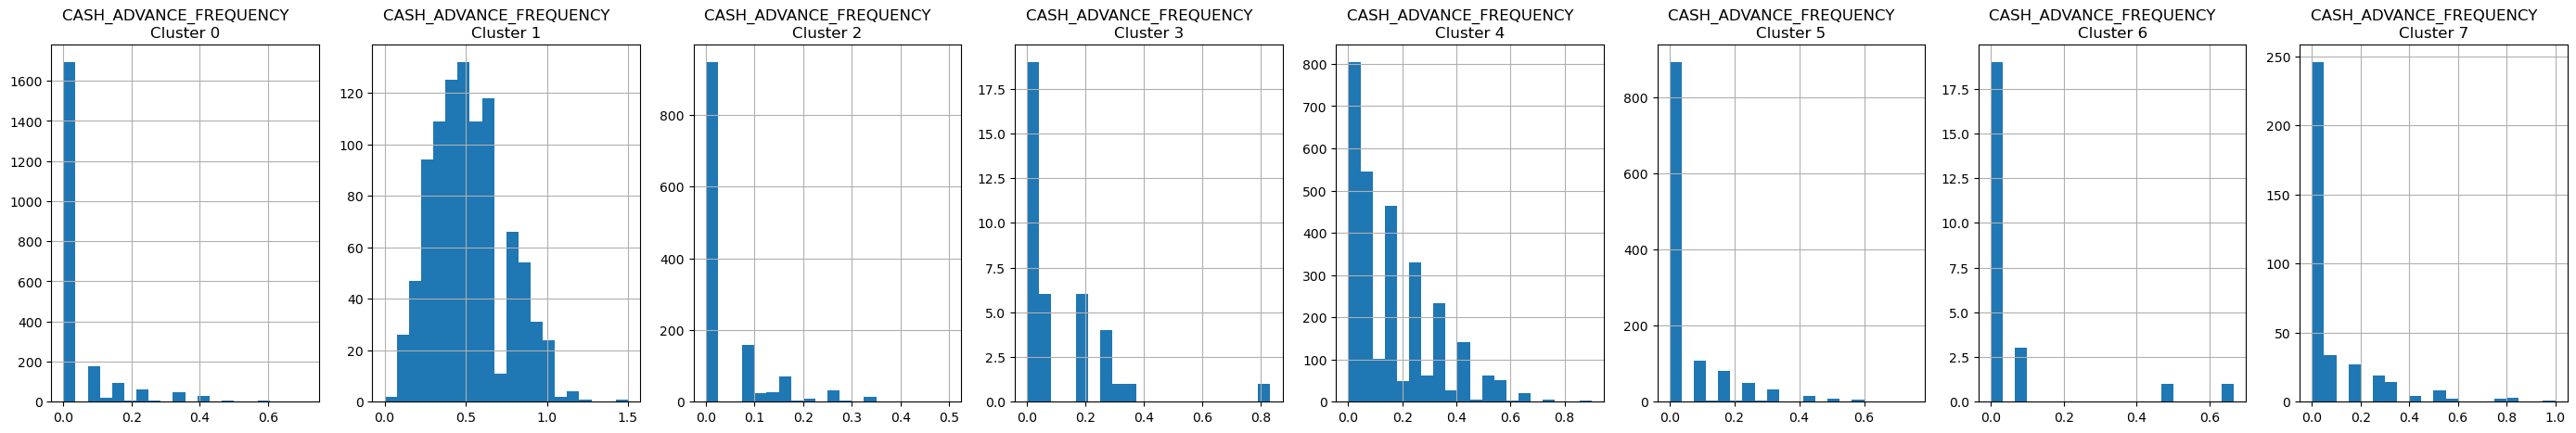

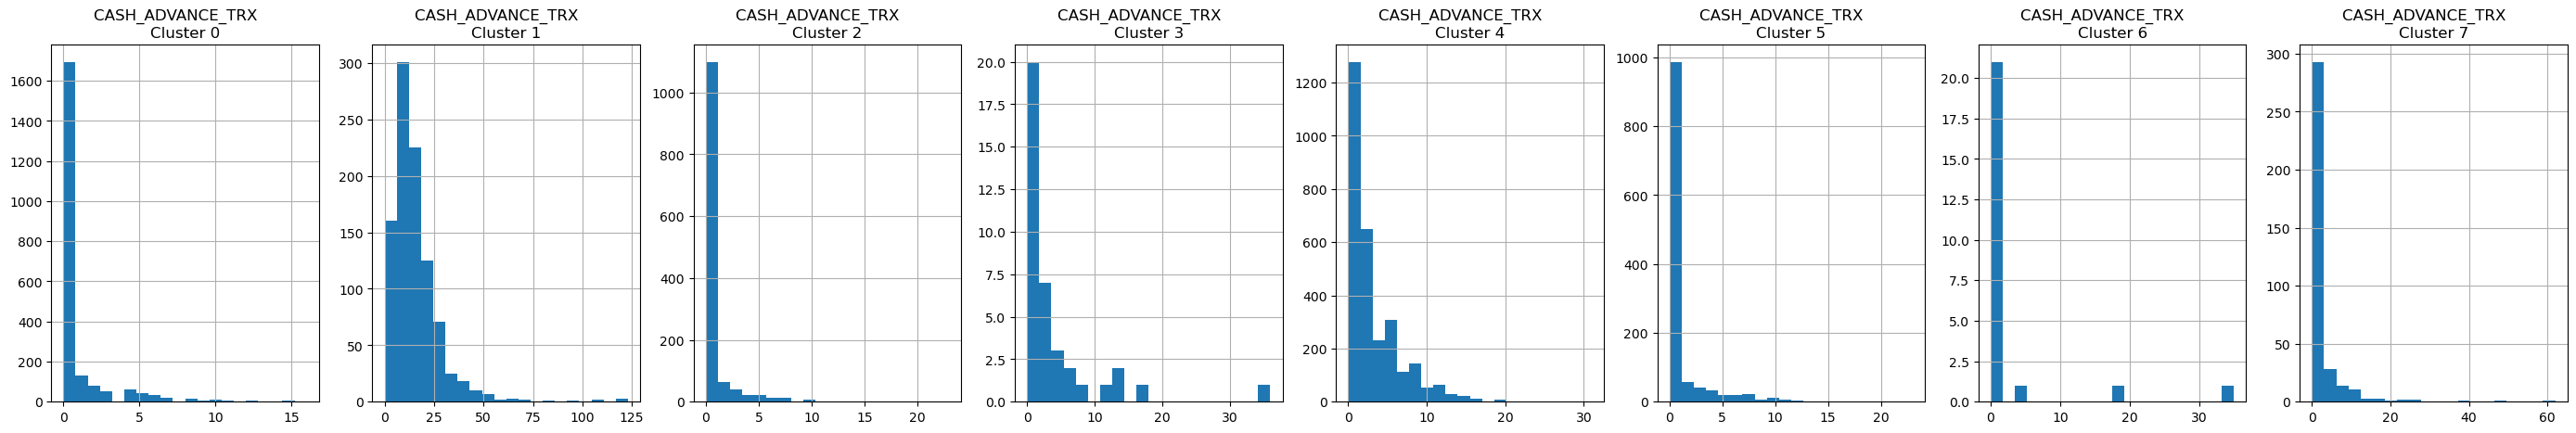

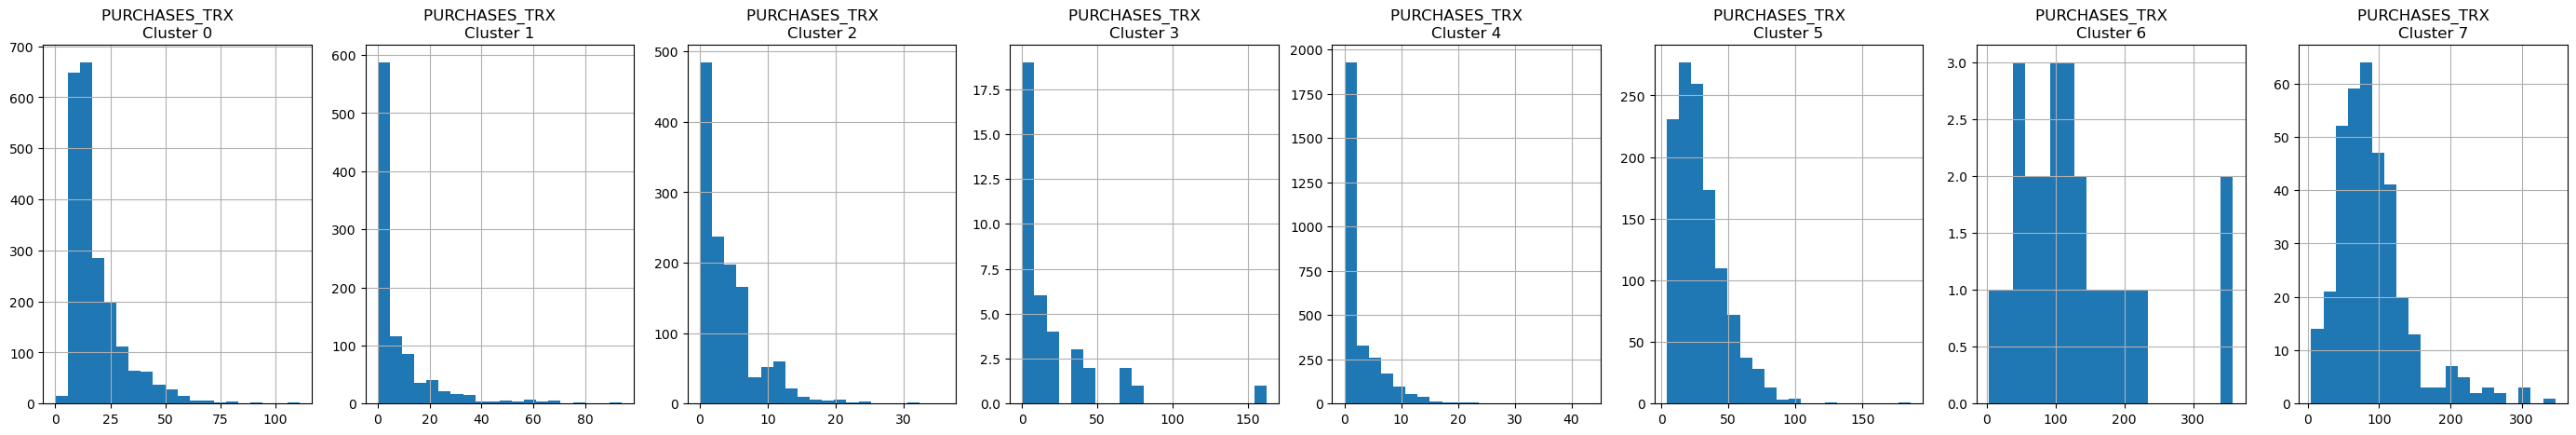

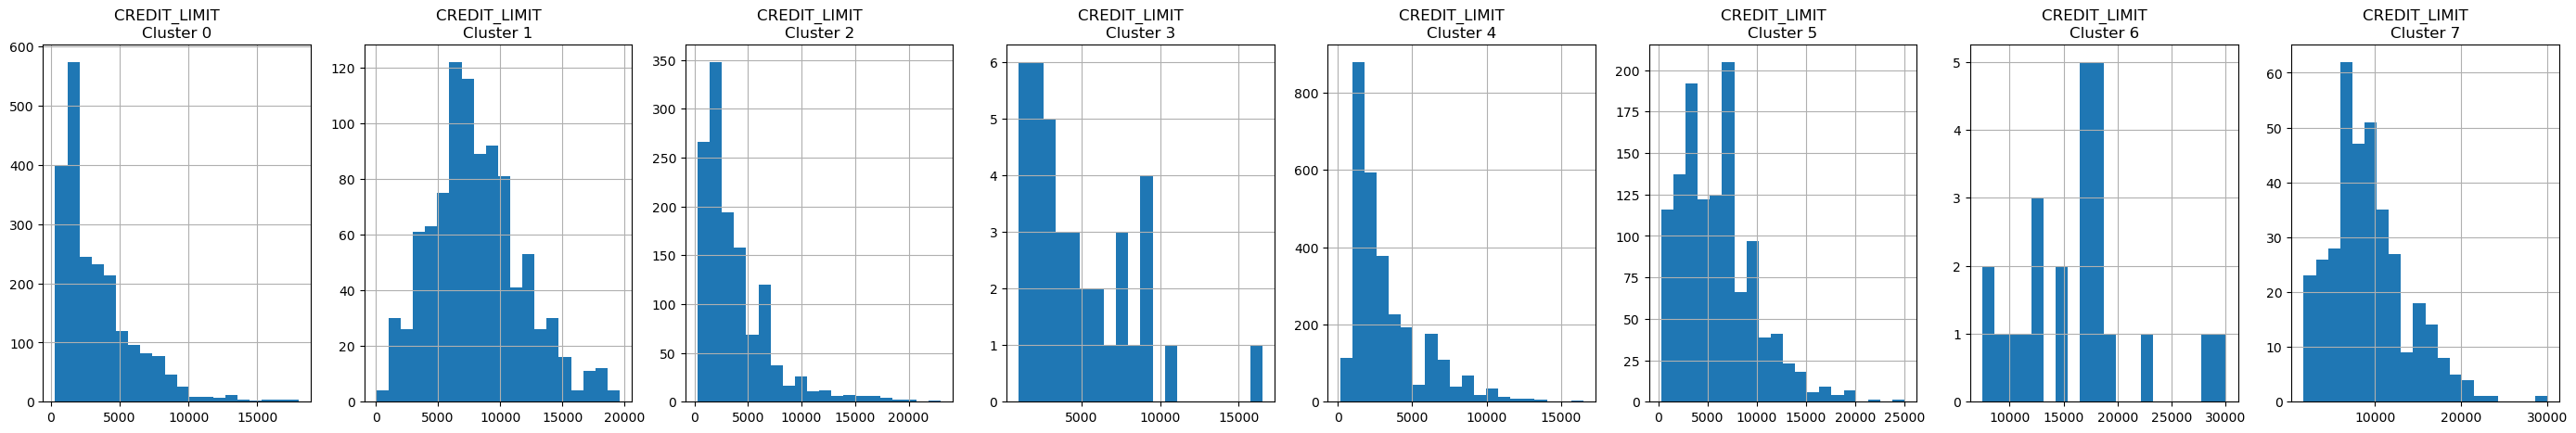

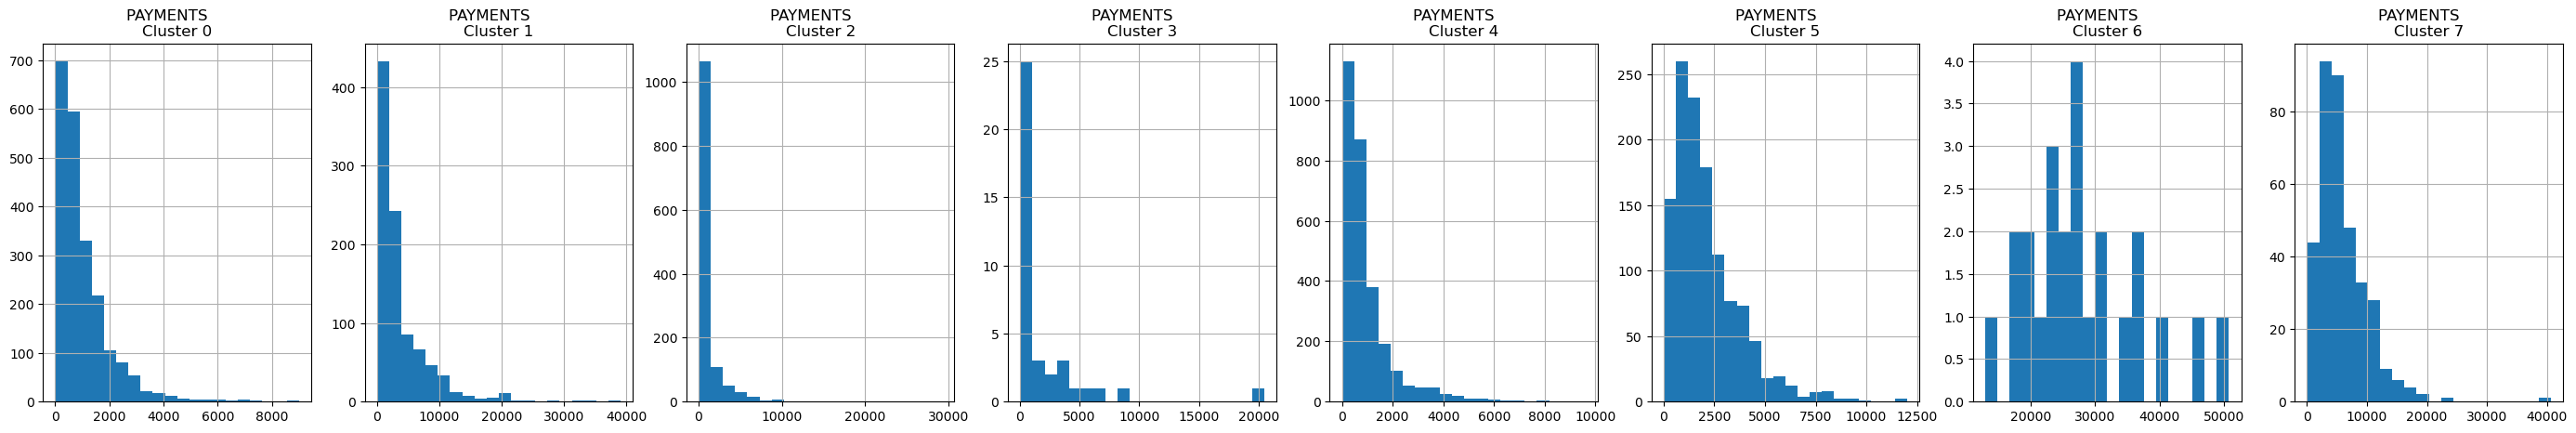

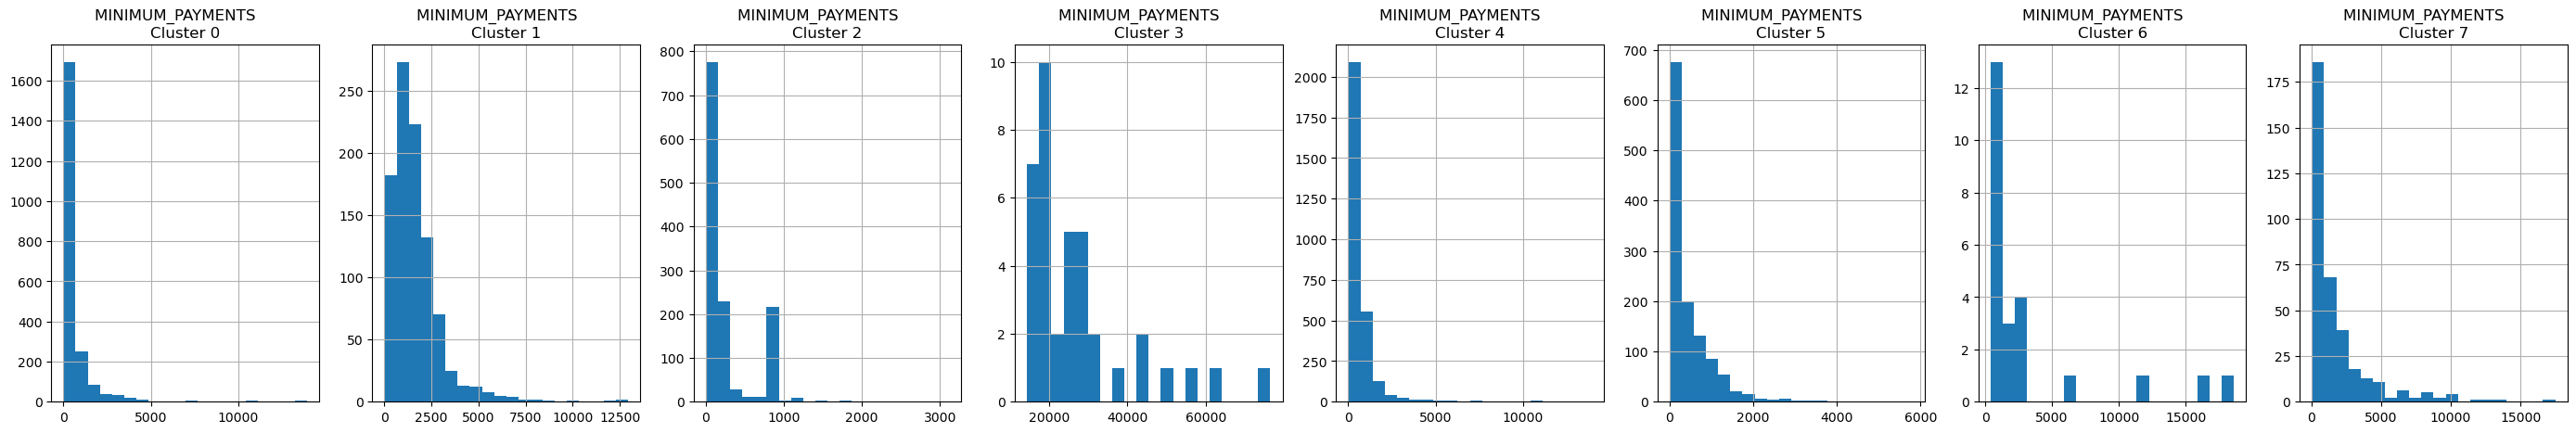

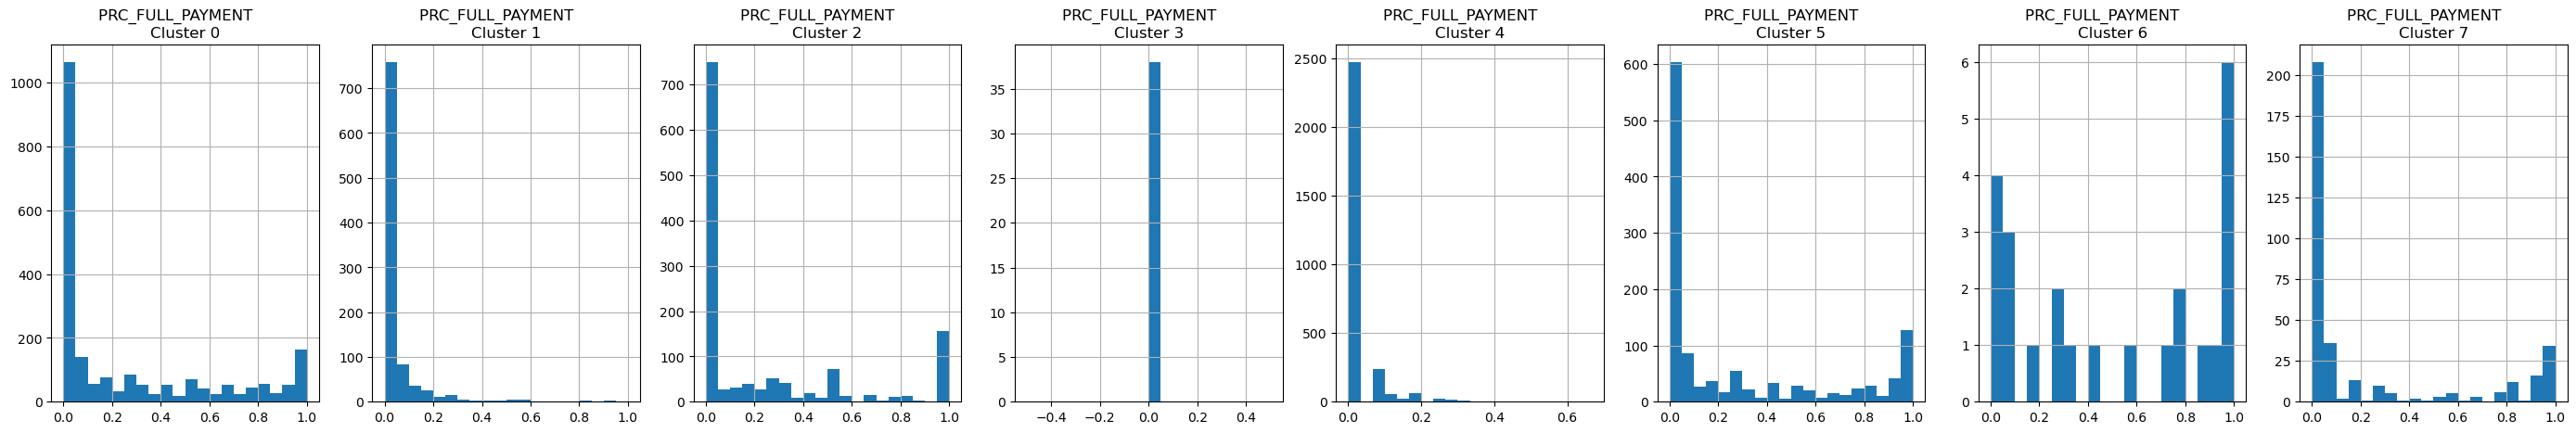

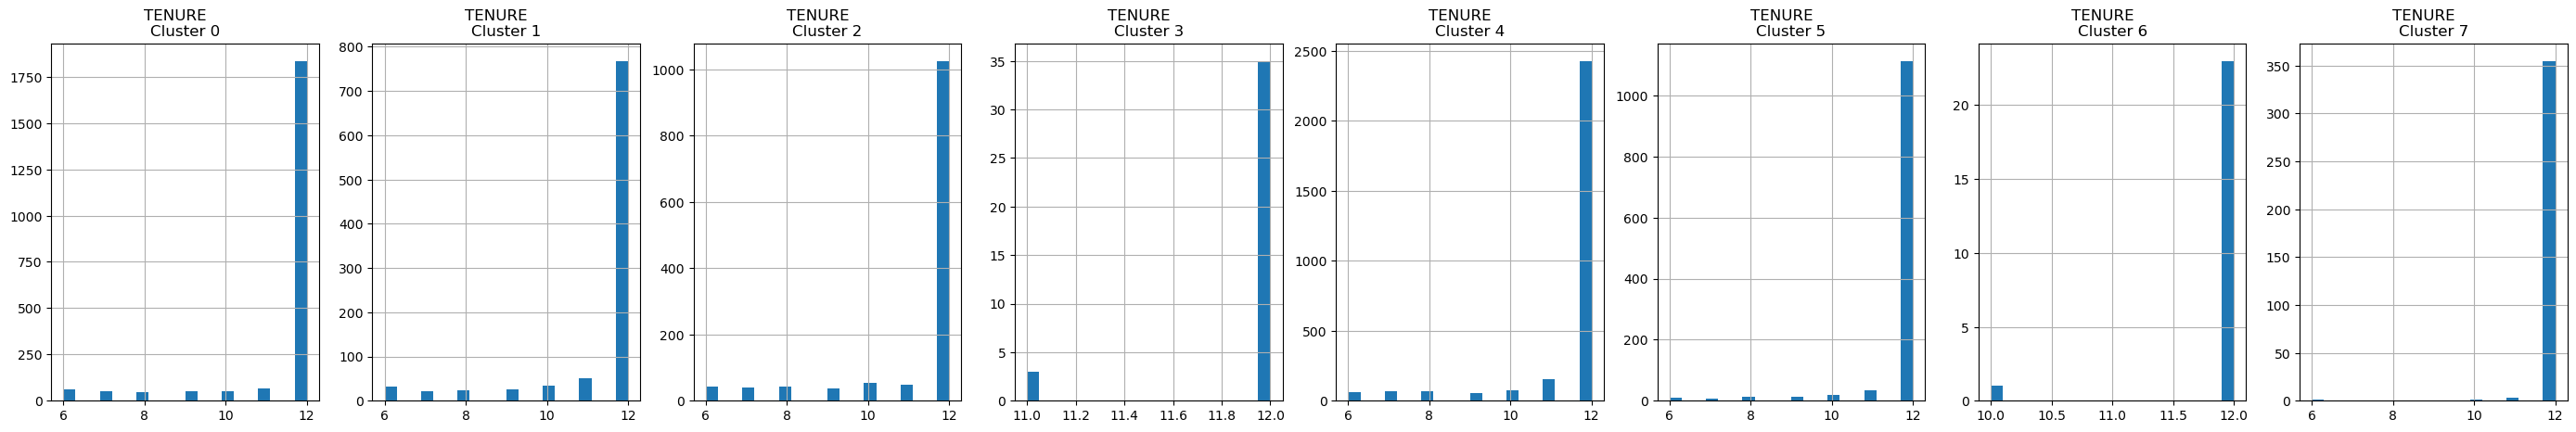

In [28]:
# By: Bastián Astudillo Fica
# Visualizamos histogramas para cada cluster 
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


<h1><center> APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS </center></h1> 

In [29]:
# By: Bastián Astudillo Fica
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222112, -1.07645161],
       [-1.13829482,  2.50647003],
       [ 0.96969194, -0.38351174],
       ...,
       [-0.9262054 , -1.8107843 ],
       [-2.33655701, -0.65796796],
       [-0.55642176, -0.40046613]])

In [30]:
# By: Bastián Astudillo Fica
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()


,pca1,pca2
0,-1.682221,-1.076452
1,-1.138295,2.506470
2,0.969692,-0.383512
3,-0.873627,0.043164
4,-1.599435,-0.688580


In [31]:
# By: Bastián Astudillo Fica
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,4
1,-1.138295,2.506470,1
2,0.969692,-0.383512,5
3,-0.873627,0.043164,4
4,-1.599435,-0.688580,4


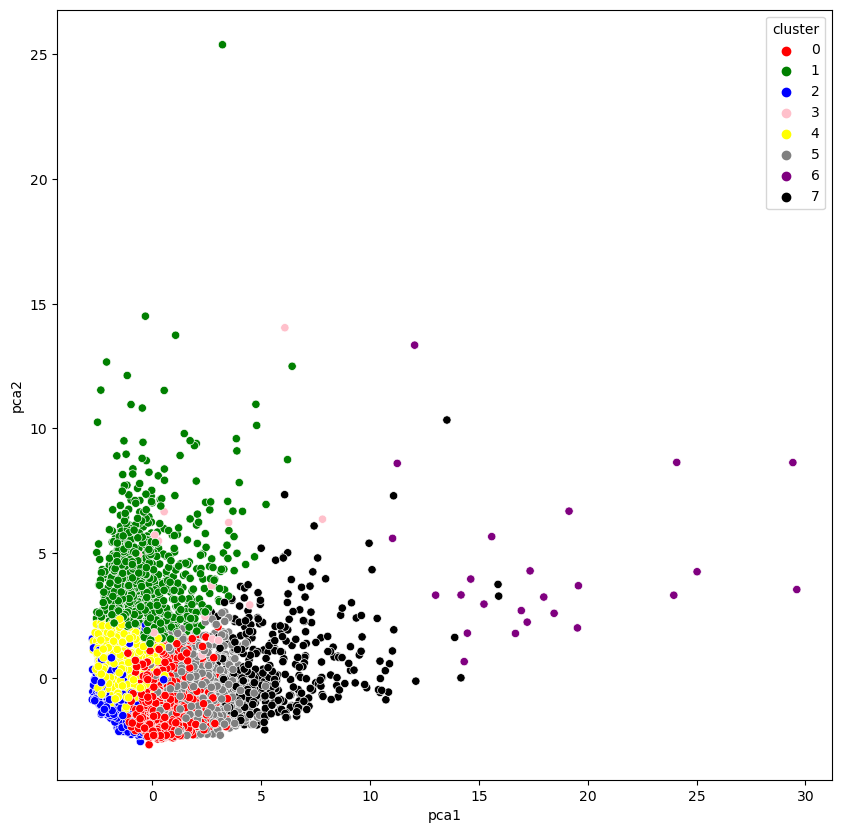

In [32]:
# By: Bastián Astudillo Fica
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

<h1><center> REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS DE REDES NEURONALES </center></h1> 


In [33]:
# By: Bastián Astudillo Fica
from tensorflow.keras.optimizers import SGD
# Importa la clase SGD del módulo optimizers de la biblioteca tensorflow.keras

In [34]:
# By: Bastián Astudillo Fica
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7
# Define la dimensión de la capa de codificación

input_df = Input(shape=(17,))
# Crea una capa de entrada con una forma de (None, 17), donde None representa la dimensión variable de las muestras

# Capas de codificación
x = Dense(encoding_dim, activation='relu')(input_df)
# Crea una capa densa de codificación con la dimensión de codificación y la función de activación 'relu'
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Crea una capa densa con 500 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Crea otra capa densa con 500 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Crea otra capa densa con 2000 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Crea la capa de salida de codificación con 10 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'

# Capas de decodificación
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
# Crea una capa densa de decodificación con 2000 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
# Crea otra capa densa de decodificación con 500 unidades, función de activación 'relu' y inicialización de pesos 'glorot_uniform'

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)
# Crea la capa de salida de decodificación con 17 unidades y inicialización de pesos 'glorot_uniform'

autoencoder = Model(input_df, decoded)
# Crea el modelo del autoencoder utilizando la capa de entrada y la capa de salida de decodificación

encoder = Model(input_df, encoded)
# Crea el modelo del encoder utilizando la capa de entrada y la capa de salida de codificación

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# Compila el modelo del autoencoder utilizando el optimizador 'adam' y la pérdida 'mean_squared_error'

In [35]:
# By: Bastián Astudillo Fica
creditcard_df_scaled.shape

(8950, 17)

In [36]:
# By: Bastián Astudillo Fica
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [37]:
# By: Bastián Astudillo Fica
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)
# Ajusta el modelo del autoencoder utilizando los datos escalados creditcard_df_scaled
# Los datos de entrada y de salida son los mismos: creditcard_df_scaled
# Utiliza un tamaño de lote de 128 muestras por iteración
# Realiza 25 épocas de entrenamiento
# Se especifica verbose=1 para mostrar el progreso del entrenamiento durante las épocas

Epoch 1/25
70/70 [==============================] - 4s 29ms/step - loss: 0.5653
Epoch 2/25
70/70 [==============================] - 2s 29ms/step - loss: 0.3755
Epoch 3/25
70/70 [==============================] - 2s 29ms/step - loss: 0.2807
Epoch 4/25
70/70 [==============================] - 2s 29ms/step - loss: 0.2135
Epoch 5/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1732
Epoch 6/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1477
Epoch 7/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1382
Epoch 8/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1285
Epoch 9/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1163
Epoch 10/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1089
Epoch 11/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1046
Epoch 12/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0992
Epoch 13/25
70/70 [==================

In [38]:
# By: Bastián Astudillo Fica
autoencoder.save_weights('autoencoder.h5')

In [39]:
# By: Bastián Astudillo Fica
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 [==============================] - 1s 3ms/step


(8950, 10)

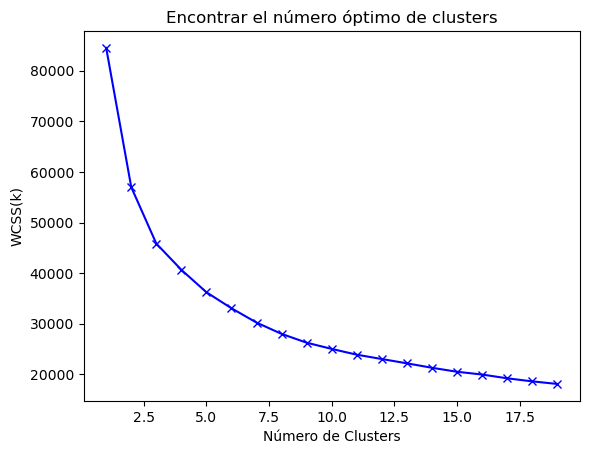

In [40]:
# By: Bastián Astudillo Fica
scores_2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10)
    # Crea una instancia de KMeans con el número de clusters y n_init = 10 para evitar la advertencia
    
    kmeans.fit(pred)
    # Ajusta el modelo de KMeans utilizando los datos pred
    
    scores_2.append(kmeans.inertia_)

plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()



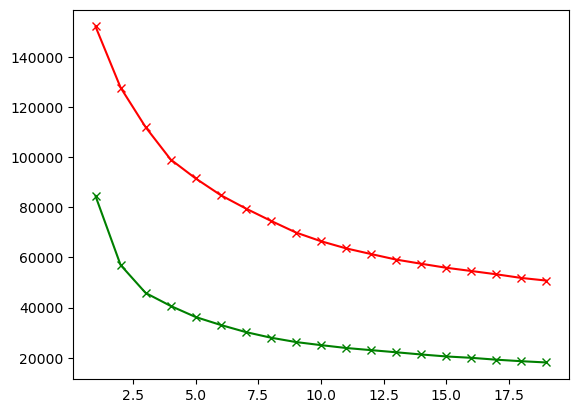

In [41]:
# By: Bastián Astudillo Fica
plt.plot(range_values, scores_1, 'rx-')
plt.plot(range_values, scores_2, 'gx-')

In [42]:
# By: Bastián Astudillo Fica
kmeans = KMeans(n_clusters=4, n_init=10)
# Crea un objeto KMeans con 4 clusters y 10 inicializaciones aleatorias

labels = kmeans.fit_predict(pred)
# Aplica el algoritmo K-means a los datos pred y asigna cada muestra a un cluster
# El método fit_predict() ajusta el modelo y devuelve las etiquetas de los clusters para cada muestra

y_kmeans = labels
# Asigna las etiquetas de los clusters a la variable y_kmeans

In [43]:
# By: Bastián Astudillo Fica
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
# Concatena el DataFrame original creditcard_df con una nueva columna 'cluster' que contiene las etiquetas de los clusters
# El eje 1 (axis=1) indica que la concatenación se realiza en dirección horizontal (agrega columnas)

df_cluster_dr.head()
# Muestra las primeras filas del DataFrame resultante

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [44]:
# By: Bastián Astudillo Fica
pca = PCA(n_components=2)
# Crea un objeto PCA con 2 componentes principales

princ_comp = pca.fit_transform(pred)
# Aplica el análisis de componentes principales (PCA) a los datos pred y obtiene las componentes principales

pca_df = pd.DataFrame(data=princ_comp, columns=["pca1", "pca2"])
# Crea un nuevo DataFrame llamado pca_df con las componentes principales como columnas
# Se especifican los nombres de las columnas como "pca1" y "pca2"

pca_df.head()

,pca1,pca2
0,-1.881875,-0.125521
1,-0.681069,1.411927
2,0.337444,-0.248238
3,-2.010016,0.224501
4,-1.762790,0.108184


In [45]:
# By: Bastián Astudillo Fica
labels

array([1, 1, 2, ..., 1, 1, 0])

In [46]:
# By: Bastián Astudillo Fica
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.881875,-0.125521,1
1,-0.681069,1.411927,1
2,0.337444,-0.248238,2
3,-2.010016,0.224501,1
4,-1.762790,0.108184,1
...,...,...,...
8945,-0.019463,-0.880530,1
8946,-0.007133,-0.440835,1
8947,-0.094928,-0.404881,1
8948,-0.275984,0.602888,1


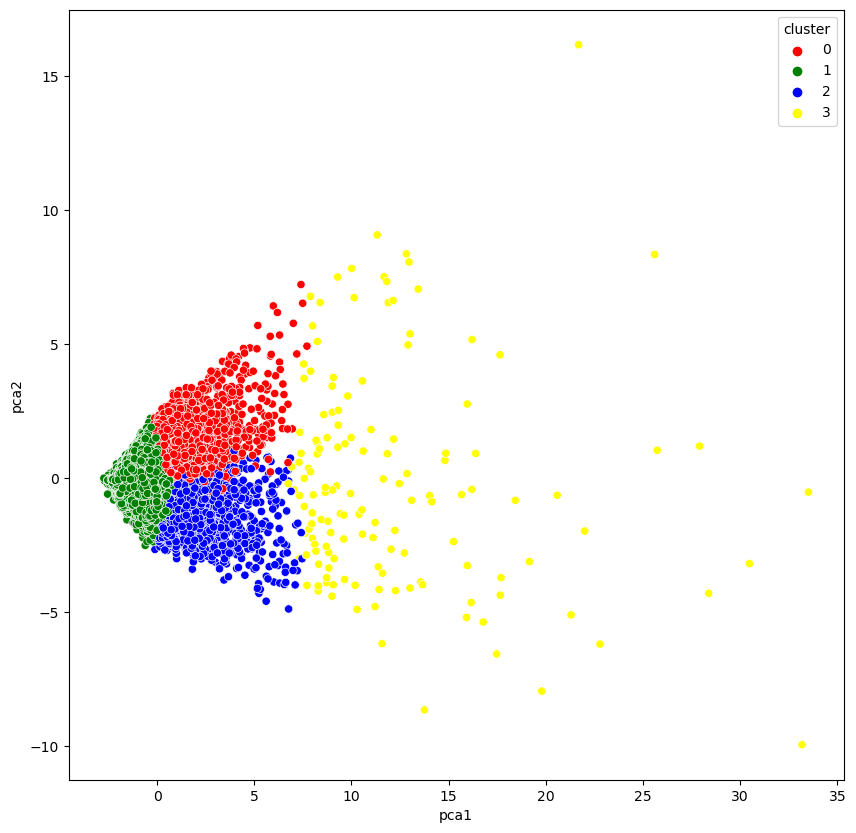

In [47]:
# By: Bastián Astudillo Fica
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

In [48]:
# By: Bastián Astudillo Fica
merged_df = pd.concat([pca_df, creditcard_df], axis=1)

In [50]:
merged_df.groupby('cluster').mean()

,pca1,pca2,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,,,
0,1.770842,1.678499,3665.475441,0.951402,738.589298,493.795301,244.896119,3819.249267,0.421428,0.200029,0.273056,0.466445,12.855491,10.540050,6179.413708,3230.858251,1895.656493,0.045212,10.779521
1,-1.073775,-0.061346,1104.186961,0.837964,426.024382,206.039372,220.299486,528.155044,0.397261,0.097825,0.308579,0.087637,1.652035,7.139218,3648.434045,979.839456,637.268668,0.123049,11.563441
2,2.079988,-1.201143,1498.407793,0.981732,2827.815796,1724.014301,1104.245611,199.205412,0.939088,0.635385,0.663823,0.043520,0.804589,43.439674,6222.744095,2536.491412,738.932233,0.371832,11.927461
3,11.972369,-0.184948,4427.911029,0.976276,10990.604726,7459.501918,3531.102808,3903.529443,0.889570,0.689966,0.740180,0.266085,14.452055,107.116438,10695.890411,14082.947627,3170.411410,0.346411,11.869863


In [49]:
# By: Bastián Astudillo Fica
creditcard_df_cluster.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,732.198182,0.949911,869.656582,165.630805,704.577710,218.962893,0.883740,0.079607,0.831182,0.042561,0.807123,18.092969,3321.733758,1026.084226,612.226443,0.259381,11.481499
1,4820.982429,0.965426,509.502803,321.192762,188.416391,5043.275717,0.297238,0.140099,0.194204,0.516895,15.833682,7.781381,7959.000571,3857.246459,1664.785738,0.039099,11.383891
2,110.989303,0.370369,324.005159,199.693532,124.541526,335.531990,0.263242,0.072667,0.181460,0.037839,0.786212,4.068939,3720.436788,1089.434001,269.563296,0.227997,11.307514
3,4527.317582,0.985646,1001.405789,228.040000,773.365789,1477.020451,0.499402,0.068780,0.452751,0.106459,3.710526,20.000000,4832.894737,1965.198711,27460.379340,0.000000,11.921053
4,1533.091645,0.964694,230.703766,186.500199,44.356790,810.290818,0.141615,0.082945,0.058857,0.163571,3.086254,2.541924,3244.421535,958.713796,729.742050,0.020791,11.504467
5,1304.924704,0.970738,2108.526278,1655.629404,452.937403,287.476370,0.874119,0.749278,0.435604,0.053344,0.982630,29.491315,6044.110083,2095.127137,497.890721,0.271153,11.786600
6,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
7,3683.817168,0.987348,6332.966694,3614.634778,2719.998583,650.317300,0.956343,0.672395,0.867639,0.079373,2.250000,91.558333,9204.444444,5920.827321,1733.555098,0.229582,11.969444
